## Breast Cancer Predicting
Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 01 2024

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay ,roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('C:/Users/abu_s/Desktop/Data/Data.csv')

In [7]:
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [11]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### Cleaning up the data

In [16]:
df.drop(columns =['Unnamed: 32','id'],inplace = True)

In [18]:
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Encoding

In [23]:
label_encoding = preprocessing.LabelEncoder()
df["diagnosis"] = label_encoding.fit_transform(df['diagnosis'])


In [25]:
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## Data Visualization

In [28]:
fig = px.scatter(df,x='radius_mean',y='concavity_mean',color='diagnosis',title='Radius mean VS Concavity mean')
fig.show(renderer='iframe')

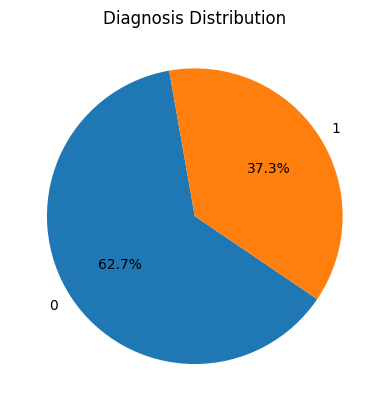

In [30]:
diagnosis_counts = df['diagnosis'].value_counts()
plt.pie(diagnosis_counts,labels=diagnosis_counts.index,autopct='%1.1f%%',startangle=100)
plt.title('Diagnosis Distribution')
plt.show()

<Axes: >

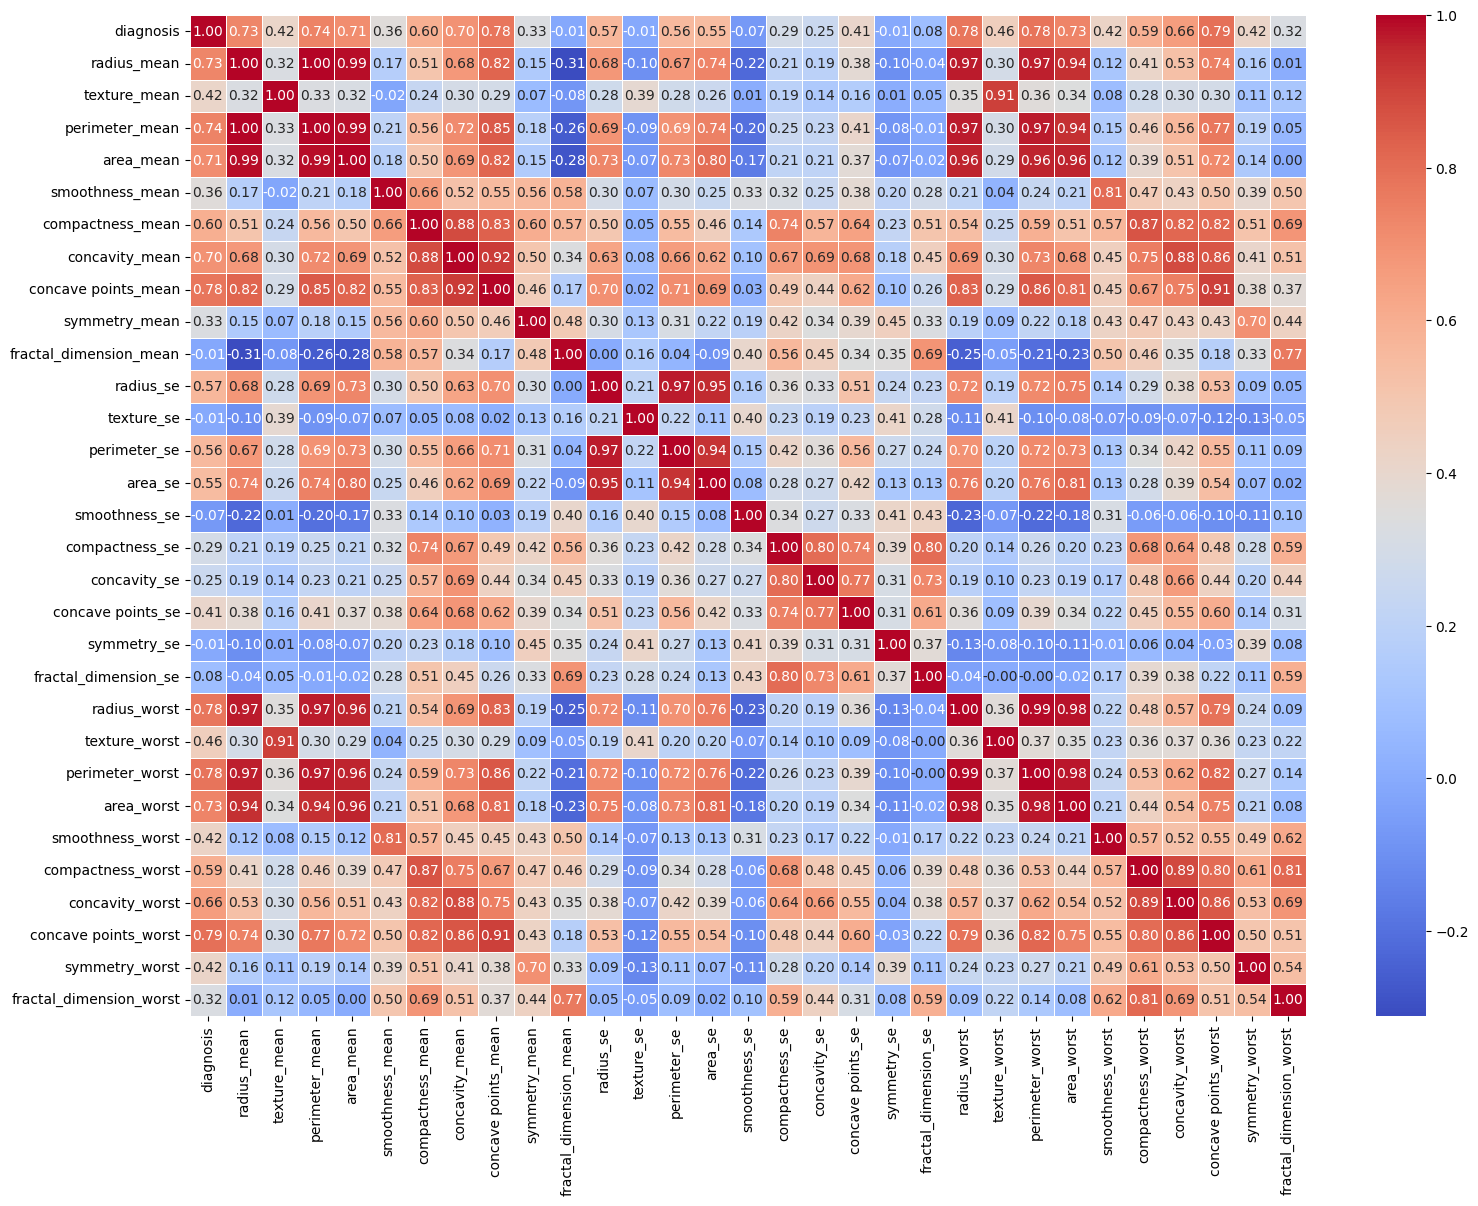

In [32]:
plt.figure(figsize=(18,13))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",linewidths=0.5,fmt='.2f')

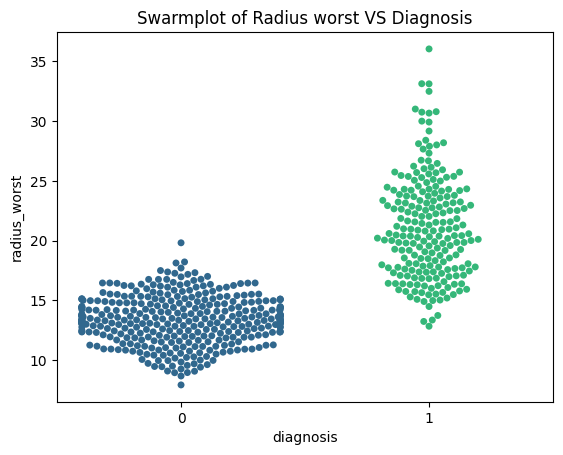

In [34]:
sns.swarmplot(df,x='diagnosis',y='radius_worst',palette='viridis')
plt.title('Swarmplot of Radius worst VS Diagnosis')
plt.show()

In [36]:
fig = px.scatter(df,x='concave points_mean',y='concave points_worst',color='diagnosis',title='Concave Points Mean VS Concave Points Worst')
fig.show(renderer='iframe')

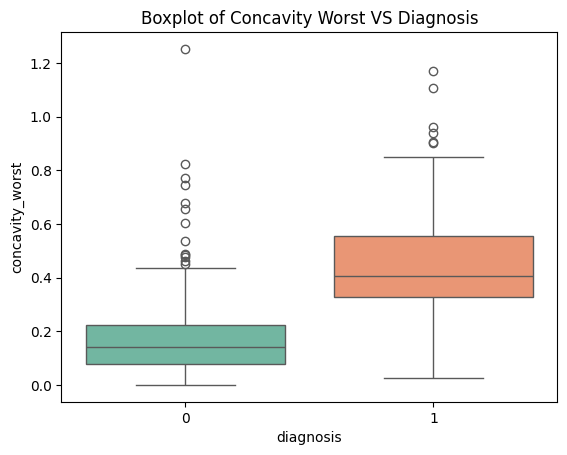

In [38]:
sns.boxplot(df,x='diagnosis',y='concavity_worst',palette='Set2')
plt.title('Boxplot of Concavity Worst VS Diagnosis')
plt.show()

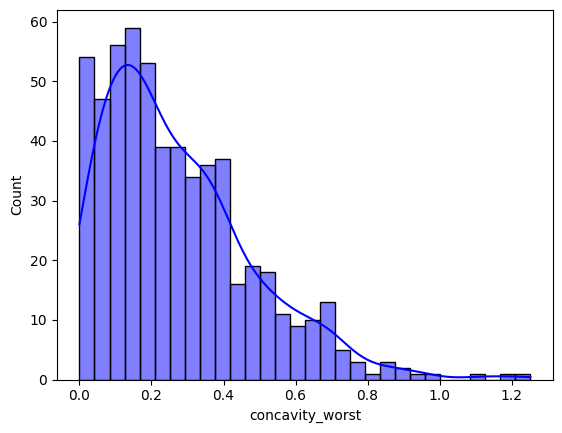

In [40]:
sns.histplot(df,x='concavity_worst',kde=True,bins=30,color='blue')
plt.show()

## Feature and target selection

In [43]:
x = df.drop(['diagnosis'],axis=1)
y= df['diagnosis']

## Training

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=True,random_state=42,test_size=0.2)

## Initialize and train the LogisticRegression 

In [49]:
# LogisticRregression Model..
Lg_model = LogisticRegression()
Lg_model.fit(x_train,y_train)


LogisticRegression()

In [63]:
Lr_score = Lg_model.score(x_train,y_train)

In [65]:
print(Lr_score)

0.9560439560439561


In [97]:
Y_pred = Lg_model.predict(x_test)
Lr_accuracy = accuracy_score(y_test,Y_pred)
print(f"Accuracy : {Lr_accuracy * 100:.2f}%")
print(classification_report(y_test,Y_pred))

Accuracy : 95.61%
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



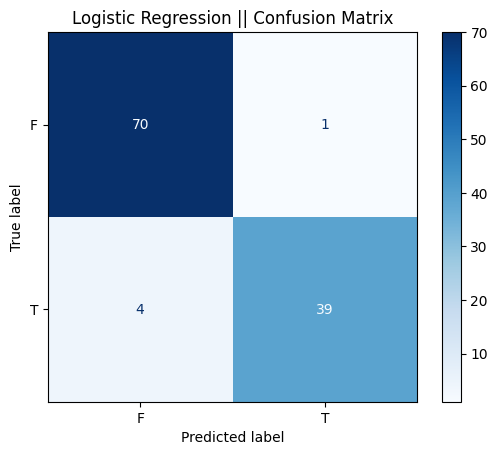

In [69]:
cm = confusion_matrix(y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['F','T'])
disp.plot(cmap='Blues')
plt.title('Logistic Regression || Confusion Matrix')
plt.show()

## Initialize and train the SVM

In [71]:
# SVM Model..
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [73]:
svm_score = svm_model.score(x_train,y_train)

In [75]:
print(svm_score)

0.9142857142857143


In [95]:
y_pred_svc = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test,y_pred_svc)
print(f"Accuracy : {svm_accuracy * 100:.2f}%")
print(classification_report(y_test,y_pred_svc))

Accuracy : 94.74%
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



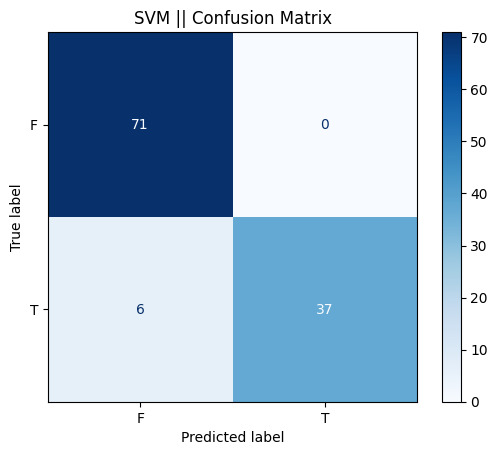

In [79]:
cm_svc = confusion_matrix(y_test,y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc,display_labels=['F','T'])
disp.plot(cmap='Blues')
plt.title('SVM || Confusion Matrix')
plt.show()

## Initialize and train the Random Forest

In [83]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
Rm_score = rf_model.score(x_train,y_train)

In [87]:
print(Rm_score)

1.0


In [93]:
y_pred_rf = rf_model.predict(x_test)
Rm_accuracy = accuracy_score(y_test,y_pred_rf)
print(f'Accuracy : {Rm_accuracy * 100:.2f}%')
print(classification_report(y_test,y_pred_rf))

Accuracy : 96.49%
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



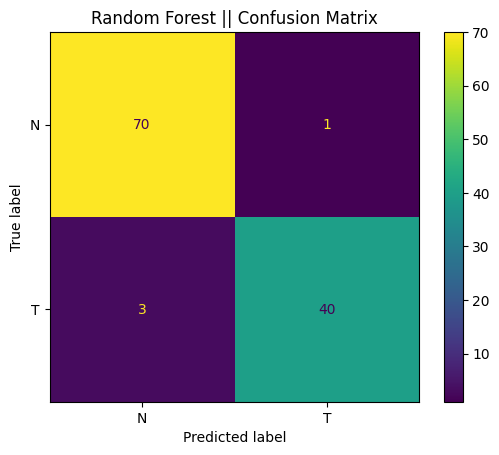

In [91]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf,display_labels = ['N','T'])
disp.plot(
    cmap='viridis',
    colorbar=True
)
plt.title('Random Forest || Confusion Matrix')
plt.show()

In [99]:
accuracy_results = Lr_accuracy, svm_accuracy, Rm_accuracy

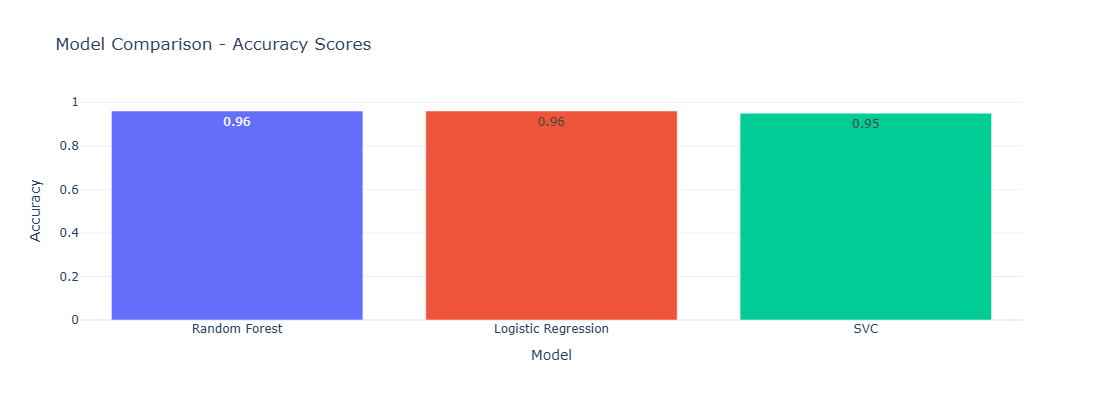

In [112]:
import plotly.graph_objects as go

# Replace these with your actual accuracy values
LogisticRegy_accurac = Lr_accuracy  # Logistic Regression accuracy
SVC_accuracy = svm_accuracy  # Example SVC accuracy
RDF = Rm_accuracy  # Random Forest accuracy



# Create a bar chart
fig = go.Figure(data=[go.Bar(
    x=["Random Forest", "Logistic Regression", "SVC"],  # Model names
    y=accuracies,  # Rounded accuracy scores
    text=accuracies,  # Display values on bars
    textposition='auto',  # Automatically position the text on bars
    marker=dict(color=['#636EFA', '#EF553B', '#00CC96'])  # Color of bars
)])

# Update layout with title, labels, and increased height
fig.update_layout(
    title="Model Comparison - Accuracy Scores",
    xaxis_title="Model",
    yaxis_title="Accuracy",
    template="plotly_white",
    height=400  # Adjust this value for desired height
)

# Show the plot
fig.show()
